# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **

In [55]:
!jupyter nbconvert --to script "New_Features.ipynb"

In [32]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

from math import ceil
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from collections import Counter

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.feature_selection import VarianceThreshold
import plotly.express as px
import joblib

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

from New_Features import * 




sns.set()

In [3]:
df = pd.read_csv("df_transform.csv")

In [4]:
df.head(5)

,customer_region,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,preferred_order_days,preferred_part_of_day,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group,last_promo_DISCOUNT,last_promo_FREEBIE,payment_method_CASH,payment_method_DIGI
0,2360.0,-0.290087,0.327289,-0.455597,-2.510296,-5.371361,-1.221305,"['DOW_6', 'DOW_0']",['18h-00h'],0.219535,-0.247962,0.836736,2.839373,-0.910966,-0.186732,0.669419,-1.313846,0.0,0.0,0.0,1.0
1,8670.0,-0.290087,-0.725594,0.120615,-2.510296,-5.371361,-1.221305,"['DOW_6', 'DOW_0']",['06h-12h'],-0.216113,0.668754,0.216075,-0.802304,-0.132847,0.902339,0.669419,-3.018849,1.0,0.0,0.0,1.0
2,4660.0,-1.105536,-0.725594,0.120615,-2.510296,-5.371361,-1.221305,"['DOW_6', 'DOW_0']",['06h-12h'],-0.977961,-0.638071,-0.839011,-0.802304,-0.910966,0.902339,-1.505379,1.600876,1.0,0.0,1.0,0.0
3,4660.0,-0.290087,-0.288608,-0.455597,-2.510296,-4.720551,-0.980332,"['DOW_1', 'DOW_6']","['06h-12h', '12h-18h']",0.315236,0.838122,0.974250,0.649793,-0.132847,-0.186732,0.669419,-0.104127,0.0,0.0,0.0,1.0
4,4660.0,-0.290087,0.327289,-1.440639,-2.510296,-4.720551,-0.980332,"['DOW_1', 'DOW_6']",['06h-12h'],0.928126,0.936618,1.862202,2.839373,-0.132847,-1.721691,0.669419,-1.313846,0.0,0.0,0.0,1.0


In [5]:
df.columns

Index(['customer_region', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'lifetime_days', 'preferred_order_days',
       'preferred_part_of_day', 'total_expenses', 'avg_per_product',
       'avg_per_order', 'avg_order_size', 'culinary_variety',
       'chain_preference', 'loyalty_to_venders', 'customer_age_group',
       'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'payment_method_CASH',
       'payment_method_DIGI'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31236 entries, 0 to 31235
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_region        31236 non-null  float64
 1   vendor_count           31236 non-null  float64
 2   product_count          31236 non-null  float64
 3   is_chain               31236 non-null  float64
 4   first_order            31236 non-null  float64
 5   last_order             31236 non-null  float64
 6   lifetime_days          31236 non-null  float64
 7   preferred_order_days   31236 non-null  object 
 8   preferred_part_of_day  31236 non-null  object 
 9   total_expenses         31236 non-null  float64
 10  avg_per_product        31236 non-null  float64
 11  avg_per_order          31236 non-null  float64
 12  avg_order_size         31236 non-null  float64
 13  culinary_variety       31236 non-null  float64
 14  chain_preference       31236 non-null  float64
 15  lo

In [7]:
nonmetric_features = ['customer_region', 'preferred_order_days', 'preferred_part_of_day', 'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'payment_method_CASH', 'payment_method_DIGI']
# even though customer_region and the features created by one-hot-encoding are technically numerical features, we will not consider them
# for the clustering. customer_region is a nominal feature, so without a natural order of importance. The features created by one-hot-encoding are
# also not considered for the clustering because (???)

In [8]:
metric_features = [col for col in df.columns if col not in nonmetric_features]

In [9]:
metric_features

['vendor_count',
 'product_count',
 'is_chain',
 'first_order',
 'last_order',
 'lifetime_days',
 'total_expenses',
 'avg_per_product',
 'avg_per_order',
 'avg_order_size',
 'culinary_variety',
 'chain_preference',
 'loyalty_to_venders',
 'customer_age_group']

## <span style="color:salmon">6. Clustering </span> 


#### <span style="color:salmon"> 6.1 Hierachial Clustering </span> 

In [10]:
#functions for ss (sum of squares), ssb (sum of squares between groups), ssw (sum of squares within groups)
# needed for later calculation of rsquared

def get_ss(df, feats):
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    return ss 


def get_ssb(df, feats, label_col):
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) ) 
    ssb = np.sum(ssb_i)
    return ssb


def get_ssw(df, feats, label_col):
    feats_label = feats+[label_col]
    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), include_groups=False)
    return df_k.sum()



In [11]:
# function to get rsquared for one cluster using previously defined methods
def get_rsq(df, feats, label_col):
    df_sst_ = get_ss(df, feats)             
    df_ssw_ = get_ssw(df, feats, label_col)     
    df_ssb_ = df_sst_ - df_ssw_                 
    
    return (df_ssb_/df_sst_)  # r2 = ssb/sst 
    

In [12]:
# function to get rsquares for multiple clusters
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    r2 = []
    feats = df.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        hclabels = cluster.fit_predict(df) 
        
        df_concat = pd.concat([df, pd.Series(hclabels, name='labels', index=df.index)], axis=1)  
        
        r2.append(get_rsq(df_concat, feats, 'labels'))
        
    return np.array(r2)


In [41]:
##########################################
# THIS TAKES A FEW MINUTES TO RUN!!
##########################################

hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(df[metric_features], 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

In [42]:
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

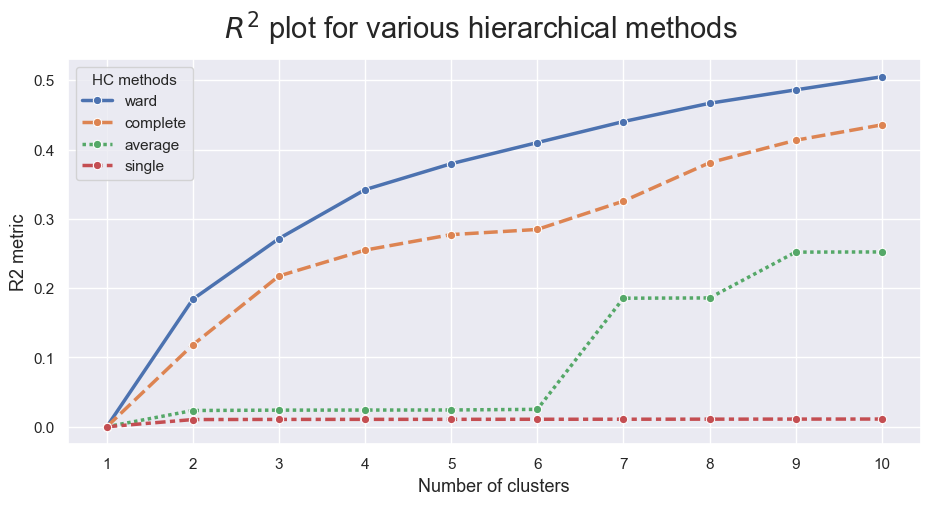

In [43]:
# plot the R2 for multiple cluster numbers
sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

### Best number of clusters seems to be 4 or 5 or 6 clusters, best linkake = ward

#### Perform clustering with 6 Clusters:

In [13]:
hclust6 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=6)
hc_labels6 = hclust6.fit_predict(df[metric_features])
hc_labels6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
labels_series = pd.Series(hc_labels6, 
                          name='labels', 
                          index=df.index
                          ) 

df_concat6 = pd.concat([df[metric_features], labels_series],axis=1)
df_concat6[metric_features+['labels']].groupby('labels').mean()

,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group
labels,,,,,,,,,,,,,,
0,-0.969954,-0.807532,-0.853001,-0.001977,-1.629933,-1.466068,-0.236277,0.837545,1.074469,1.008314,-0.810723,-0.372925,0.656215,0.038814
1,0.139435,0.086049,0.529927,-0.049909,0.150319,0.337557,-0.455224,-0.936801,-0.821122,-0.123357,0.189490,0.672505,-0.076297,-0.057635
2,1.521323,1.598024,1.440364,-0.885158,0.522364,0.863527,1.243791,-0.213373,-0.123857,0.111279,1.480707,0.264502,-0.721953,0.158196
3,0.189208,0.128030,-0.028116,0.026166,0.271319,0.438456,0.458260,0.481439,0.424902,0.060850,0.027325,-0.072044,0.104196,-0.071150
4,-1.152626,-1.377058,-0.810127,0.825833,-0.278302,-1.619548,-1.288963,0.162542,-0.184248,-0.784406,-0.938853,-0.020566,0.669419,-0.014433
5,-0.450830,-0.055016,-1.406263,0.123103,0.124713,0.290602,0.211387,0.345246,0.299351,0.027868,-0.494399,-1.694499,-0.786150,0.159797


#### Perform clustering with 5 Clusters:

In [15]:
hclust5 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels5 = hclust5.fit_predict(df[metric_features])
hc_labels5

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [16]:
labels_series = pd.Series(hc_labels5, 
                          name='labels', 
                          index=df.index
                          ) 
df_concat5 = pd.concat([df[metric_features], labels_series],axis=1)
df_concat5[metric_features+['labels']].groupby('labels').mean()

,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group
labels,,,,,,,,,,,,,,
0,0.039870,0.085320,-0.349676,0.048784,0.237112,0.403957,0.400657,0.449662,0.395608,0.053155,-0.094408,-0.450608,-0.103546,-0.017263
1,-0.969954,-0.807532,-0.853001,-0.001977,-1.629933,-1.466068,-0.236277,0.837545,1.074469,1.008314,-0.810723,-0.372925,0.656215,0.038814
2,1.521323,1.598024,1.440364,-0.885158,0.522364,0.863527,1.243791,-0.213373,-0.123857,0.111279,1.480707,0.264502,-0.721953,0.158196
3,0.139435,0.086049,0.529927,-0.049909,0.150319,0.337557,-0.455224,-0.936801,-0.821122,-0.123357,0.189490,0.672505,-0.076297,-0.057635
4,-1.152626,-1.377058,-0.810127,0.825833,-0.278302,-1.619548,-1.288963,0.162542,-0.184248,-0.784406,-0.938853,-0.020566,0.669419,-0.014433


#### performing clustering with 4 clusters not necessary, as explained later

### Sizes and Averages for Clustering with 6 Clusters

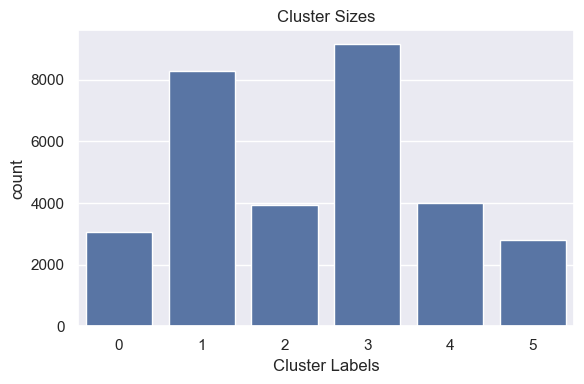

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_concat6, x='labels')
ax.set_title("Cluster Sizes")
ax.set_xlabel("Cluster Labels")
fig.tight_layout()
plt.show()

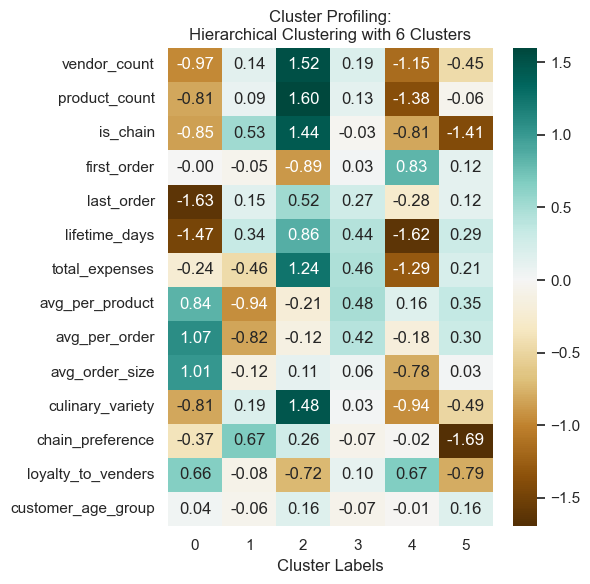

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
hc_profile = df_concat6.groupby('labels').mean().T
sns.heatmap(hc_profile,center=0, annot=True, cmap="BrBG", fmt=".2f",ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 6 Clusters")
fig.tight_layout()
plt.show()

### Sizes and Averages for Clustering with 5 Clusters

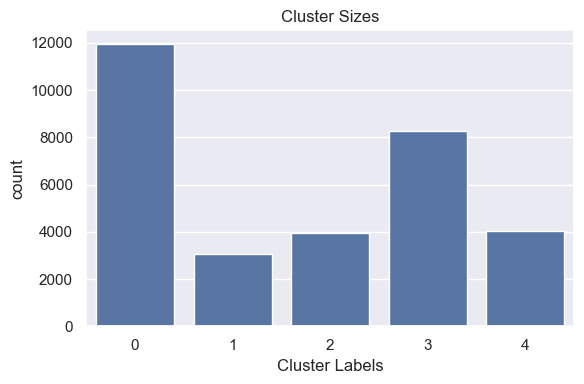

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_concat5, x='labels')
ax.set_title("Cluster Sizes")
ax.set_xlabel("Cluster Labels")
fig.tight_layout()
plt.show()

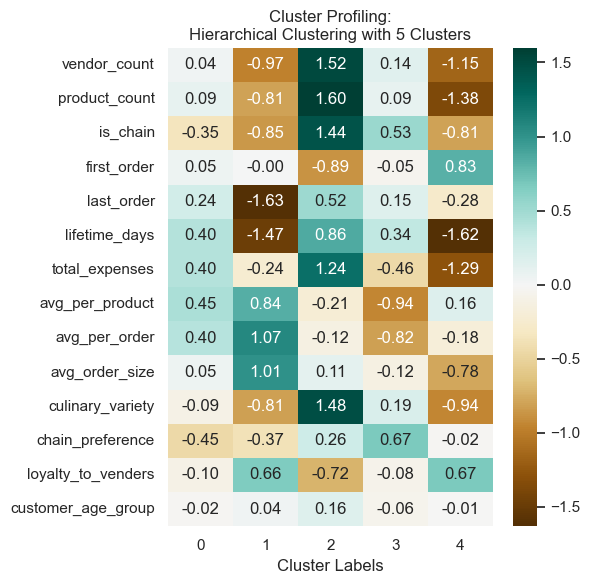

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
hc_profile = df_concat5.groupby('labels').mean().T
sns.heatmap(hc_profile,center=0, annot=True, cmap="BrBG", fmt=".2f",ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 5 Clusters")
fig.tight_layout()
plt.show()

### Analysis of these results:

#### 6 clusters:

For 6 clusters, we see the cluster **1** and **3** have the biggest amount of data. **0** and **5** have the least amount of data and **2** and **4** have a bit more data than **0** and **5**. We can conclude that clusters **1** and **3** represent the "normal" costumer, who does not have some outstanding(?) attributes, whilst **0** and **5** represent a smaller and more specific group of costumers. 

Costumers in cluster **2** have the very high values in vendor_count, product_count, total_expenses, so they represent the costumers who make the most orders. They also have low first_order value and high lifetime, so they first placed orders a long time ago and stayed with us for a long time/still place orders. They are our **best** and **most valuable** costumers. They also show high values in is_chain and culinary_variety, whilst having low values in loyality, meaning they order from a lot of different restaurants also in different types of food, especially prefering chains.

Costumers in cluster **4** represent the counter part for the costumers in cluster **2**, they have very low value for lifetime_days so they did not spend a lot of time using ABCDEATS, and also in this time they did not place a lot of orders and did not spend a lot of money. They represent our **"worst" costumers**.

Costumers in clusters **1** and **3** represent the **standard  costumers**, they are similar. But costumers in cluster **1** have lower values in total expenses and average order sizes, whilst having higher values in chain preference. So they can be seen as the standard costumers who tend to **spend less**, whilst the costumers from cluster **3** can be seen as the standard costumers who use the ABCDEATS **more regularly**. 

Costumers in cluster **5** can be seen as a smaller part from the cluster **3**, but with lower values in chain_preference, is_chain and loyality, meaning that these costumers **avoid using chains**.

Costumers in cluster **0** have low vendor_count and Product_count, but they have very high values in avearge_per_product, avg_per_order and avg_order_size, meaning they **dont make a lot of orders, but when they do they make big orders**. Also they have a very low value for last_order, meaning they very recently used ABCDEATS

#### 5 clusters:

For 5 clusters we can see that 4 of them are exactly equal to ones from the 6 Clustering (2 from 5 is equal to 2 from 6, 
4 is equal to 4, 3 equal to 1 and 1 equal to 0). The cluster 0 from the 5-clustering divides itself in the clusters 3 and 5 from the 
6-clustering as only difference between the 2. So the difference between these approaches are the basic costumers who avoid using chains being seperated
into an own cluster.

## Final decision:

In our opinion, the seperation of the basic costumers who avoid chains into an own cluster can be useful and makes sense,
especially considering costumer-specific advertisments, in which in this case these users could receive different, non-chain-related,
advertisments. Thats why we prefer the clustering with 6 clusters over the one with 5 clusters. A deeper analysis of the one with 4 clusters does
not make sense at this point since we already prefer the one with 6 over the one with 5, and with 4 clusters our data would potentially be 
generalized too much.
So finally we decide for the best **number of clusters being 6**

#### <span style="color:salmon"> 6.2 Kmeans Clustering </span> 

#### Looking for best number of clusters

In [28]:
range_clusters = range(1, 11)

In [29]:
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df[metric_features])
    inertia.append(kmclust.inertia_)

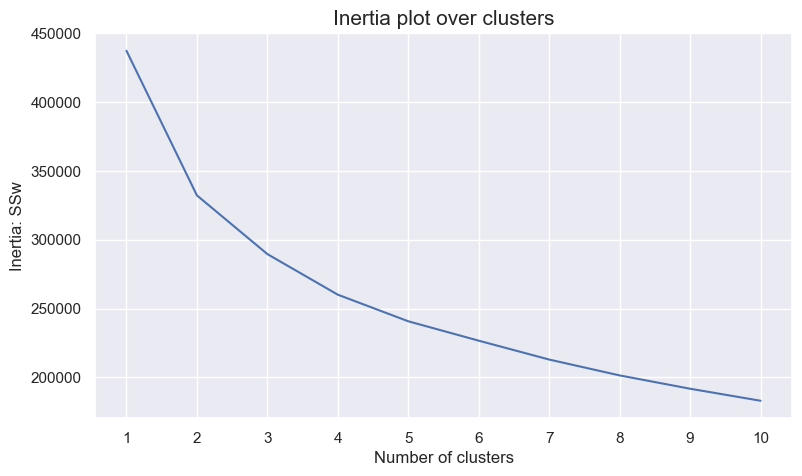

In [30]:
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

#### We see that best value should be between 2, 3 or 4

##### Using Silhouette plot for more insights before decision:

For n_clusters = 2, the average silhouette_score is : 0.20683853788780313
For n_clusters = 3, the average silhouette_score is : 0.17657570366487635
For n_clusters = 4, the average silhouette_score is : 0.16391268967826864
For n_clusters = 5, the average silhouette_score is : 0.1674522374029352
For n_clusters = 6, the average silhouette_score is : 0.1669918565181342
For n_clusters = 7, the average silhouette_score is : 0.17182590708435314
For n_clusters = 8, the average silhouette_score is : 0.16471185876540262
For n_clusters = 9, the average silhouette_score is : 0.15754796131517262
For n_clusters = 10, the average silhouette_score is : 0.16651781045201372


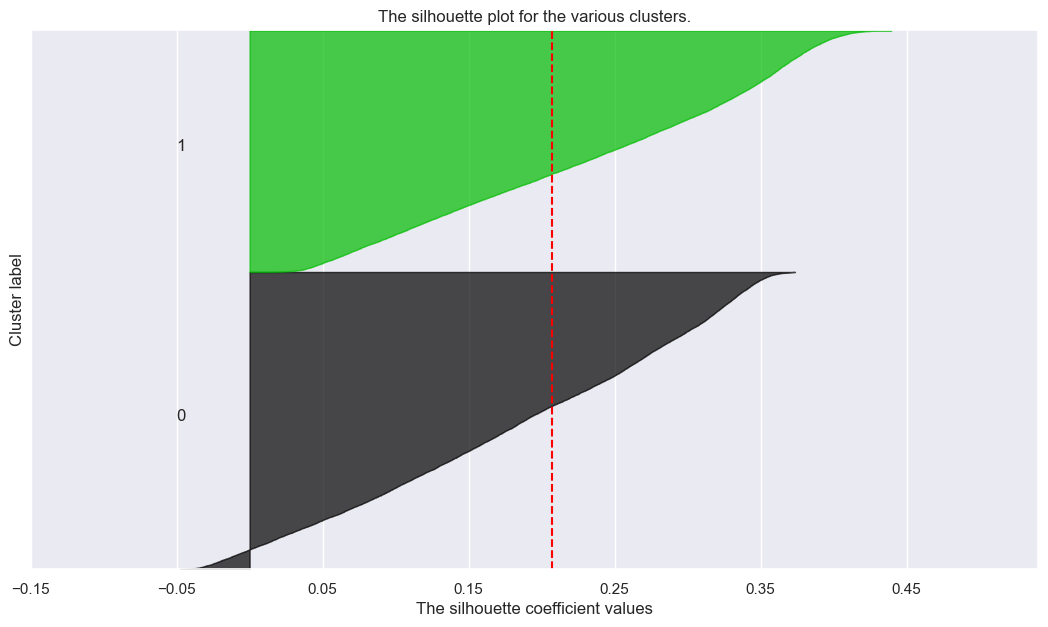

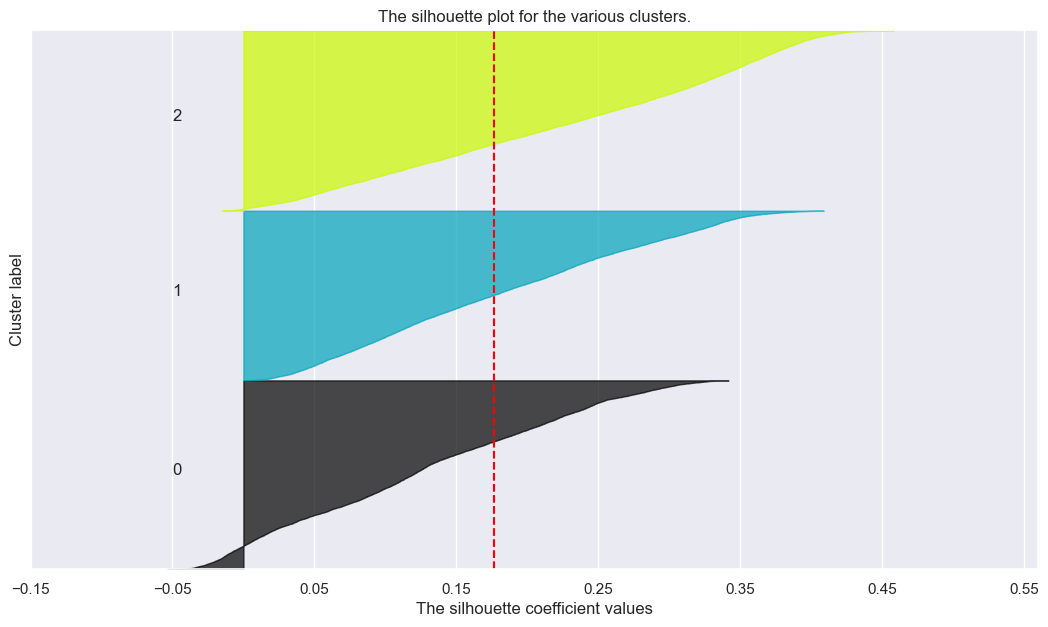

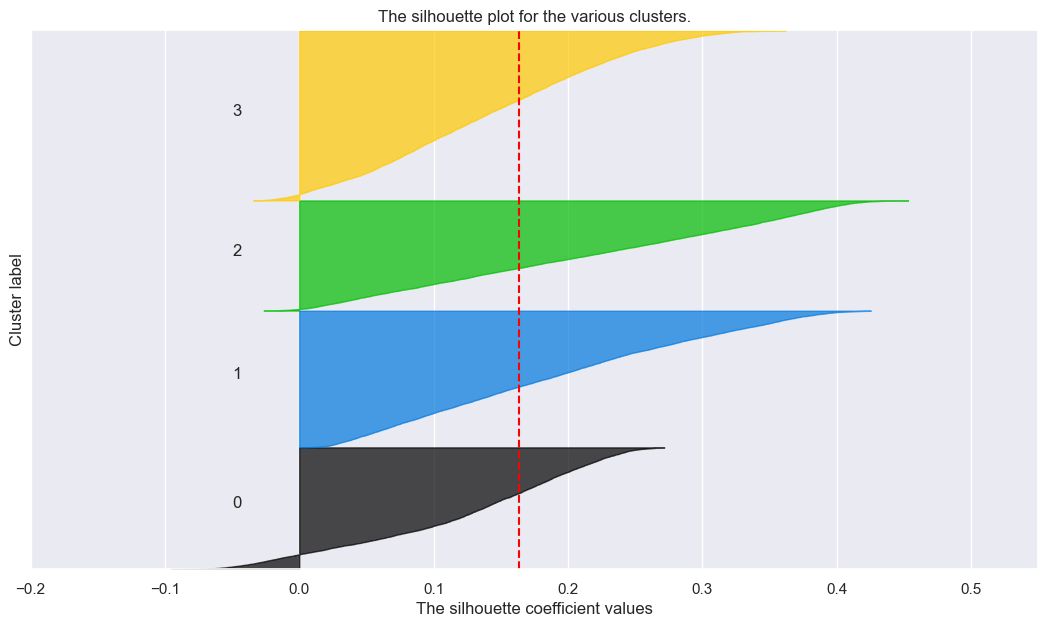

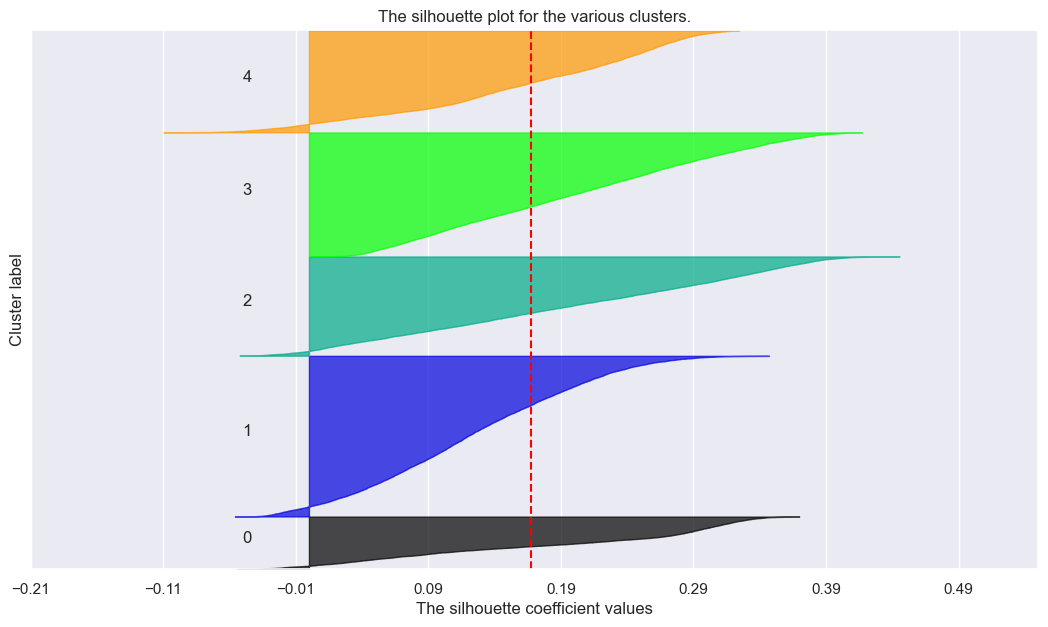

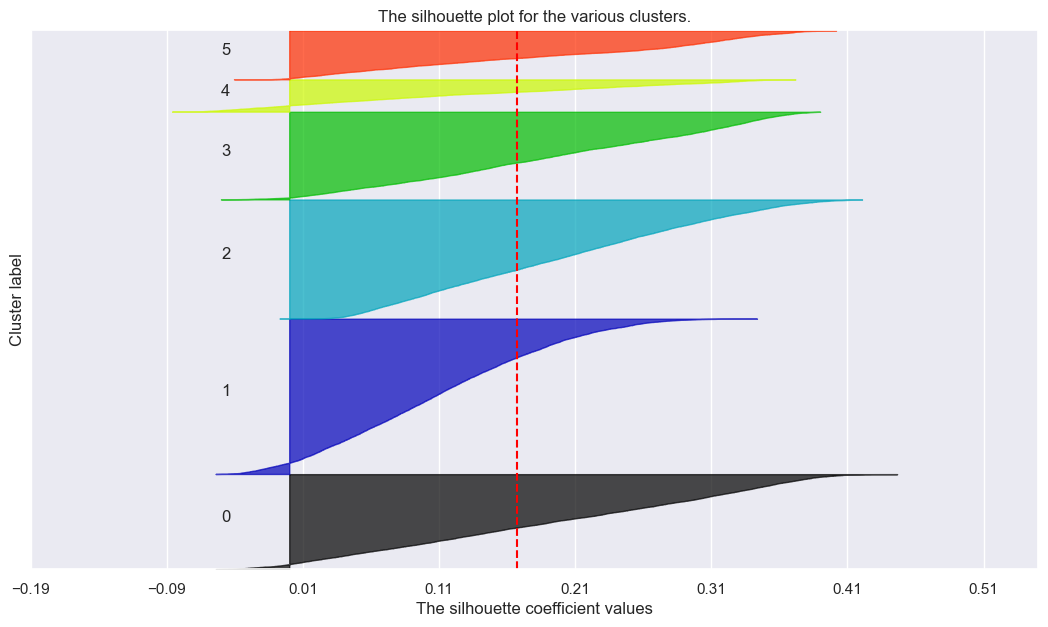

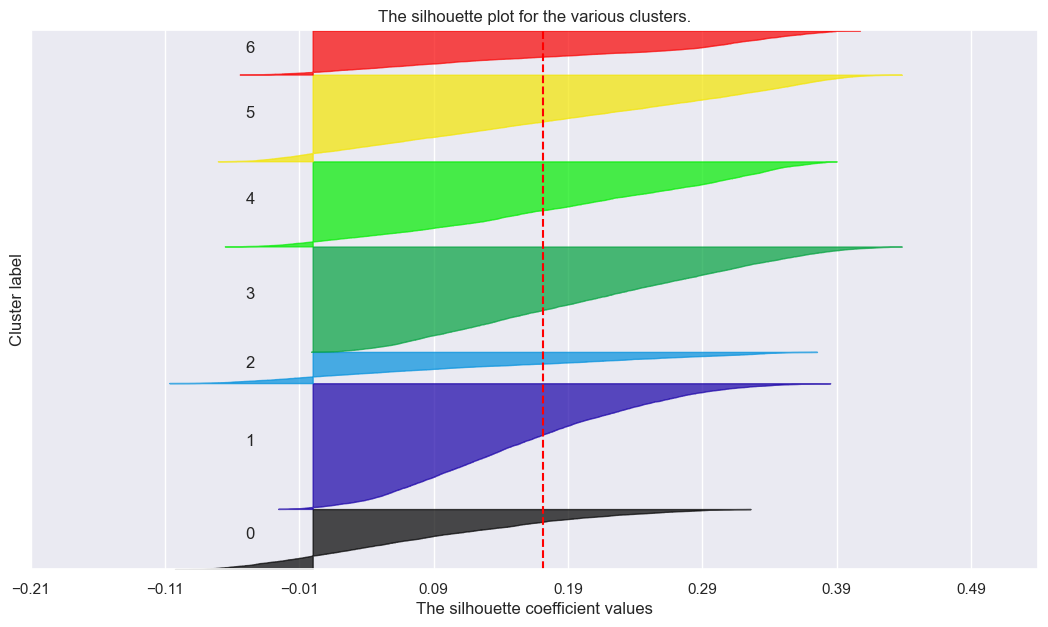

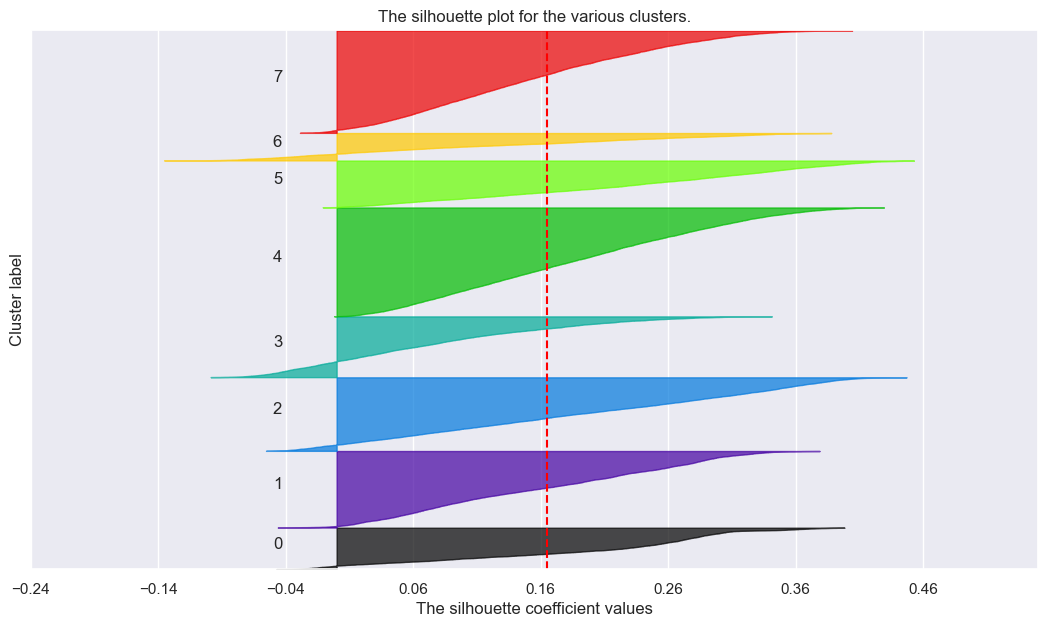

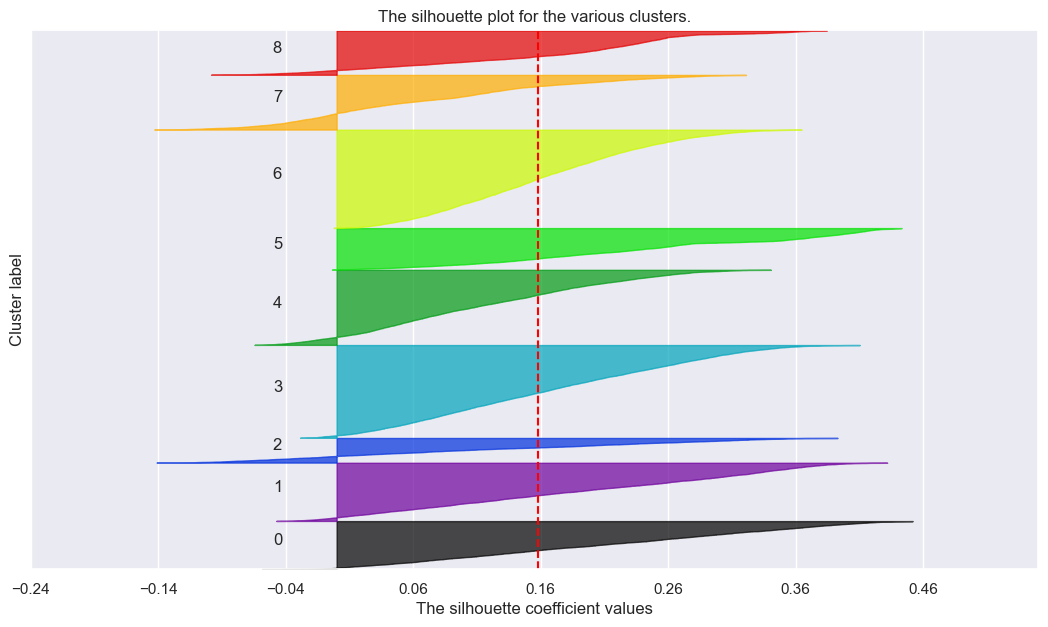

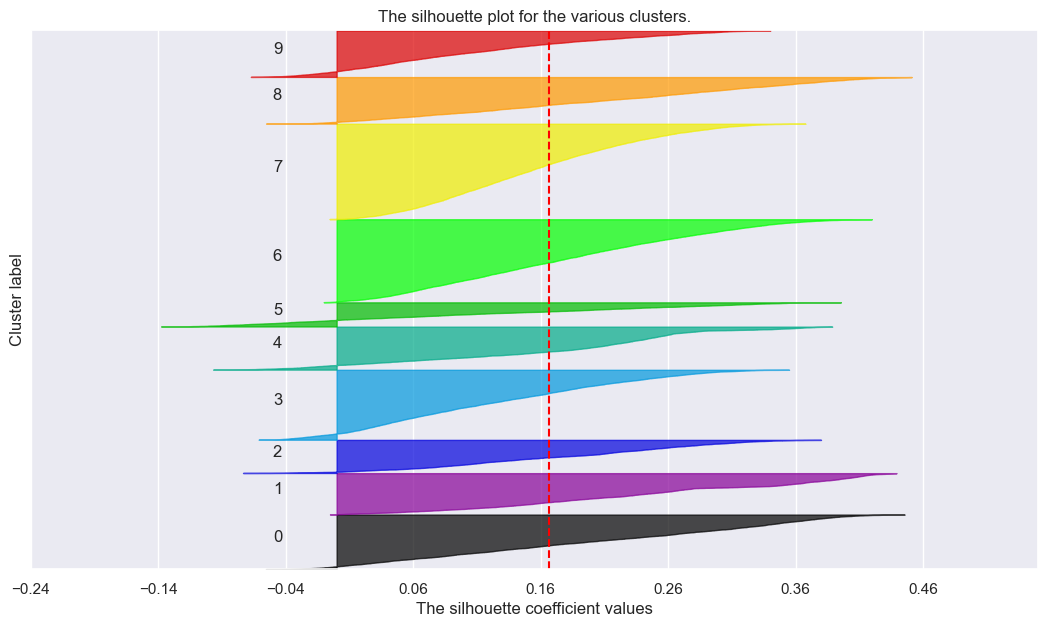

In [33]:
avg_silhouette = []
for nclus in range_clusters:
    if nclus == 1:
        continue
    fig = plt.figure(figsize=(13, 7))

    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

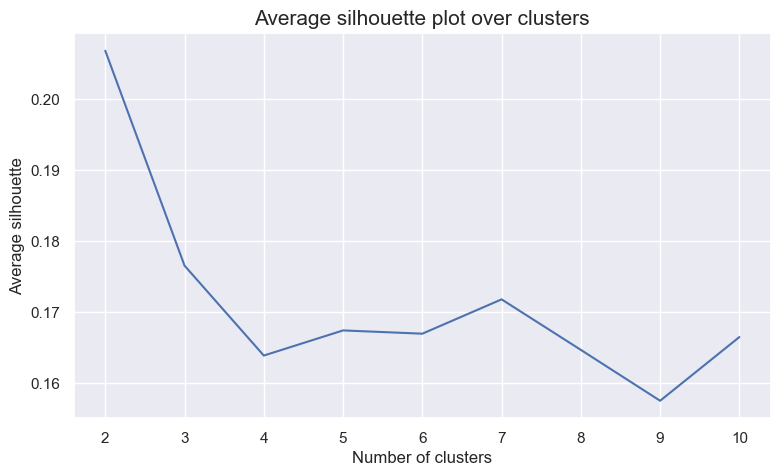

In [34]:
plt.figure(figsize=(9,5))


plt.plot(range_clusters[1:],
         avg_silhouette)

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

#### Following the silhouette plots, the values 2 and 3 look best for number of clusters. 4 looks equally divided, but with quite low Silhouette values
#### The Average Silhouette plot confirms these observations

### Even though the value 4 might not be the best choice statistically, one of the main objectives of our clustering is the possible
### extraction of business ideas for certain groups of customers, and in our opinion dividing the costumers in only 3 groups is not enough.
### So we decide for the value 4 as the number of clusters used, since higher values have even worse results in kmeans clustering, and lower values
### dont offer enough differenciation between customers. 

In [38]:
# Different initialization method and provide more n_init
kmclust4 = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust4.fit(df[metric_features])

KMeans(n_clusters=4, n_init=15, random_state=1)

In [39]:
kmclabels4 = kmclust4.predict(df[metric_features])

In [40]:
# Characterizing the final clusters
df_concat4 = pd.concat((df[metric_features], pd.Series(kmclabels4, name='labels', index=df.index)), axis=1)
df_concat4.groupby('labels').mean()

,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group
labels,,,,,,,,,,,,,,
0,-1.034314,-1.041464,-0.873985,0.511930,-0.810858,-1.525195,-0.598170,0.701291,0.633391,0.179621,-0.863721,-0.311369,0.619961,-0.014971
1,-0.213369,-0.379907,0.163947,0.150878,-0.012521,0.078515,-0.886484,-0.975925,-1.007000,-0.525674,-0.187287,0.581273,0.090024,-0.024879
2,1.405003,1.408975,1.334051,-0.817823,0.506325,0.851723,0.953433,-0.441205,-0.330774,0.072499,1.407460,0.329466,-0.547787,0.023659
3,0.001817,0.138186,-0.370242,0.042061,0.262766,0.477471,0.522925,0.567783,0.569825,0.246753,-0.142934,-0.457557,-0.161428,0.015383


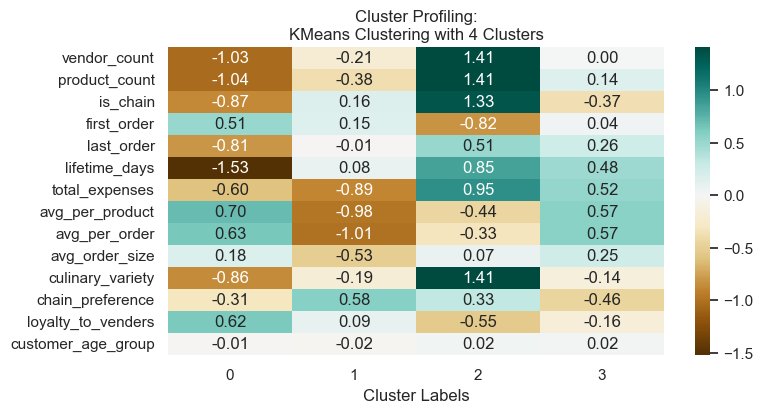

In [51]:
fig, ax = plt.subplots(figsize=(8,4))

km_profile = df_concat4.groupby('labels').mean().T

sns.heatmap(km_profile,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax 
            )

ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 4 Clusters")
plt.show()

#### Create crosstab to compare the clusters from Hiearachial clustering and Kmeans:

In [50]:
# Create crosstab between km_labels and pc_km_labels

pd.crosstab(
    pd.Series(hc_labels6, name='HC6', index=df.index),
    pd.Series(kmclabels4, name='KM4', index=df.index)
    )

KM4,0,1,2,3
HC6,,,,
0,2789,174,2,109
1,450,5152,1968,709
2,0,121,3486,324
3,381,1405,928,6437
4,3113,903,0,0
5,330,168,6,2281


The highest spenders, our best costumers, from the Hierachial Clustering (Group 2) mostly move into the group **2** of the Kmeans Clustering with 4 clusters. The lowest spenders from the HC (Group 4) mostly move into the group **0** from the Kmeans. The costumers who dont make a lot of orders, but when they do they make quit big orders also move into group **0**, meaning that the new group **0** is composed mainly by the low spenders and the ones who dont make a lot of orders even if they might spend a lot.

The groups 3 and 5 from the HC, who are composed by the "basic" costumers who tend to spend regulary (Group 5 can be distinguished by the preference to avoid chain restaurants by its costumers), mostly move into the group **3** of kmeans. But this group **3** also receives some costumers from the former group 1 (also "basic" costumers but those who tend to spend less money). So the new group **3** can be seen as the one which represents best the regular spending "basic" costumers.

Finally the new group **1** is mostly composed by the former group 1 ("basic" costumers who spend less), but it also receives a lot of costumers from the former groups 3 and 4, which represents the regular "basic" costumers and the lowest spenders.

### As a conclusion, we decide to stay with the results from the Hierachial Clustering since the higher number of clusters leads to a better and more profunde distinction between the costumers, whilst the Kmeans Clustering with only 4 groups of costumers joined some costumers into groups who can be distinguished reasonably into different groups.